<a href="https://colab.research.google.com/github/n8mcdunna/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Nathan_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [24]:
def statistics(list):
  N = len(list)
  sum = 0
  numerator = 0
  var = 0
  # Calculating mean
  for item in list:
    sum += item
  mean = sum / N
  # Calculating variance
  for item in list:
    numerator += (item - mean)**2
  var = numerator / N
  # Calculating standard deviation
  std = var ** 0.5
  return mean, var, std

In [32]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print(statistics(sales))
# Checking my answer with library functions
array = pd.Series([3505, 2400, 3027, 2798, 3700, 3250, 2689])
print(array.mean())
print(array.var(ddof= 0))
sales_std = array.std(ddof= 0)
print(sales_std)


(3052.714285714286, 183761.06122448976, 428.67360686714756)
3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [27]:
customers = [127, 80, 105, 92, 120, 115, 93] 
df = pd.DataFrame({'sales': sales, "customers": customers})
df.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [43]:
num = df['customers'].cov(df['sales'])



In [49]:
statistics(customers)

(104.57142857142857, 249.3877551020408, 15.792015549069118)

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [48]:
customers_std = df['customers'].std(ddof= 1)
sales_std = df['sales'].std(ddof= 1)
print(customers_std)
print(sales_std)
denominator = sales_std * customers_std
corr_coeff = df.cov() / denominator
print(corr_coeff)
print(df.corr())
np.corrcoef(customers, sales)

17.057326313123664
463.0204150595357
               sales  customers
sales      27.144959   0.962834
customers   0.962834   0.036839
              sales  customers
sales      1.000000   0.962834
customers  0.962834   1.000000


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [68]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [69]:
# Getting just the numeric columns
titanic = titanic.select_dtypes(include= 'number')
titanic = titanic.drop(labels= 'Unnamed: 0', axis= 1)
titanic.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [70]:
# Variance-Covariance matrix
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [71]:
# Correlation matrix
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

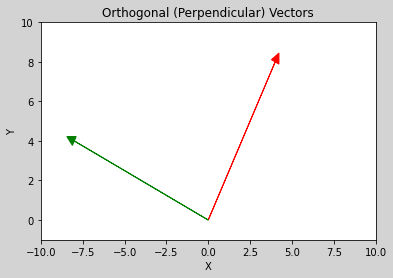

dot product:  0


In [87]:
# Perpendicular is synonym for orthogonal
x = [4, 8]
y = [-8, 4]

fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')
plt.arrow(0,0, x[0], x[1],head_width=.5, head_length=0.5, color ='r')
plt.arrow(0,0, y[0], y[1],head_width=.5, head_length=0.5, color ='g')
plt.xlim(-10,10)          
plt.ylim(-1,10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Orthogonal (Perpendicular) Vectors")
plt.show()

print('dot product: ', np.dot(x,y))

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [88]:
a = [-5, 3, 7]
b = [6, -8, 2]
print('dot product: ', np.dot(a,b))

dot product:  -40


In [ ]:
# Vectors a and b are not orthogonal because their dot product does not equal zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [98]:
c= np.array([2, -15, 6, 20])
print((np.linalg.norm(c)) ** 2)
print(np.dot(c,c))
print(np.matmul(c.T, c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

### Linear combinations of d and e

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [101]:
a_hat = 4*np.array([1,0,0,0,0])
b_hat = 12*np.array([0,1,0,0,0])
c_hat = 11*np.array([0,0,1,0,0])
d_hat = 9*np.array([0,0,0,1,0])
e_hat = 2*np.array([0,0,0,0,1])

f = [a_hat, b_hat, c_hat, d_hat, e_hat]
f

[array([4, 0, 0, 0, 0]),
 array([ 0, 12,  0,  0,  0]),
 array([ 0,  0, 11,  0,  0]),
 array([0, 0, 0, 9, 0]),
 array([0, 0, 0, 0, 2])]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

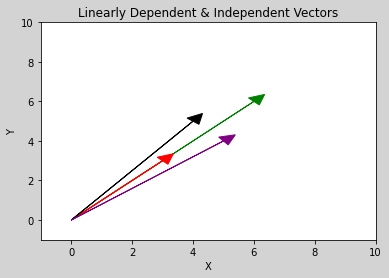

In [108]:
# Linearly dependent vectors
x= [3,3]
y= [6,6]

# Linearly independent vectors
w= [4, 5]
z= [5, 4]

fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')
plt.arrow(0,0, y[0], y[1],head_width=.5, head_length=0.5, color ='g')
plt.arrow(0,0, x[0], x[1],head_width=.5, head_length=0.5, color ='r')
plt.arrow(0,0, w[0], w[1],head_width=.5, head_length=0.5, color ='k')
plt.arrow(0,0, z[0], z[1],head_width=.5, head_length=0.5, color ='purple')

plt.xlim(-1,10)          
plt.ylim(-1,10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linearly Dependent & Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# The span is the line that g and h lie on since they both lie on the same line and are linearly dependent.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
# Since l, m, and n are linearly independent the span is everything in a three dimensional space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



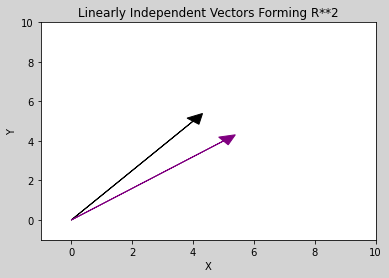

In [112]:
# Linearly independent vectors
w= [4, 5]
z= [5, 4]

fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')

plt.arrow(0,0, w[0], w[1],head_width=.5, head_length=0.5, color ='k')
plt.arrow(0,0, z[0], z[1],head_width=.5, head_length=0.5, color ='purple')

plt.xlim(-1,10)          
plt.ylim(-1,10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linearly Independent Vectors Forming R**2")
plt.show()

## 6.2 What does it mean to form a basis?

Taking linearly independent vectors that span a space in two dimensions. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [137]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [138]:
P[1] = P[1] + P[0]
P 

array([[ 1,  2,  3],
       [ 0,  2, 10],
       [ 4,  8,  2]])

In [139]:
P[1] = P[0] * 0.5

In [140]:
P

array([[1, 2, 3],
       [0, 1, 1],
       [4, 8, 2]])

In [141]:
P[2] = P[2] - P[0] * 4
P

array([[  1,   2,   3],
       [  0,   1,   1],
       [  0,   0, -10]])

In [142]:
P[2] = P[2] / -10
P

array([[1, 2, 3],
       [0, 1, 1],
       [0, 0, 1]])

In [ ]:
# The rank of P is 3 since there are three dimensions in the matrix when the matrix is in a reduced form.

## 7.2 What does the rank of a matrix tell us?

The dimension of the vector space spanned by the matrix columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [144]:
v= np.array([1, 3])
w= np.array([-1, 2])
numerator= np.dot(w, v) * v
denominator= np.dot(v,v)
print('numerator: ', numerator)
print('denominator: ', denominator)
projL_w = numerator / denominator
projL_w

numerator:  [ 5 15]
denominator:  10


array([0.5, 1.5])

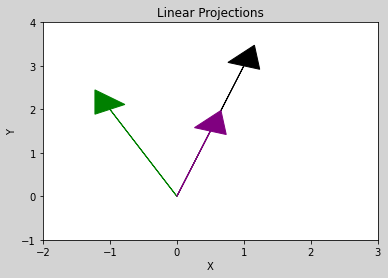

In [148]:
fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')

plt.arrow(0,0, v[0], v[1],head_width=.5, head_length=0.5, color ='k')
plt.arrow(0,0, w[0], w[1],head_width=.5, head_length=0.5, color ='g')
plt.arrow(0,0, projL_w[0], projL_w[1],head_width=.5, head_length=0.5, color ='purple')

plt.xlim(-2,3)          
plt.ylim(-1,4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear Projections")
plt.show()

# Projecting the green vector onto the black vector creates the purple projection vector.

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

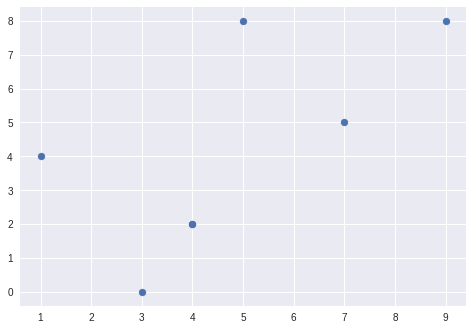

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()